# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [98]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io 
from skimage.transform import rescale
from skimage import img_as_float
from skimage import morphology
from skimage import filters
from skimage import measure
from skimage import draw

from matplotlib import cm


Pretty printing has been turned ON


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

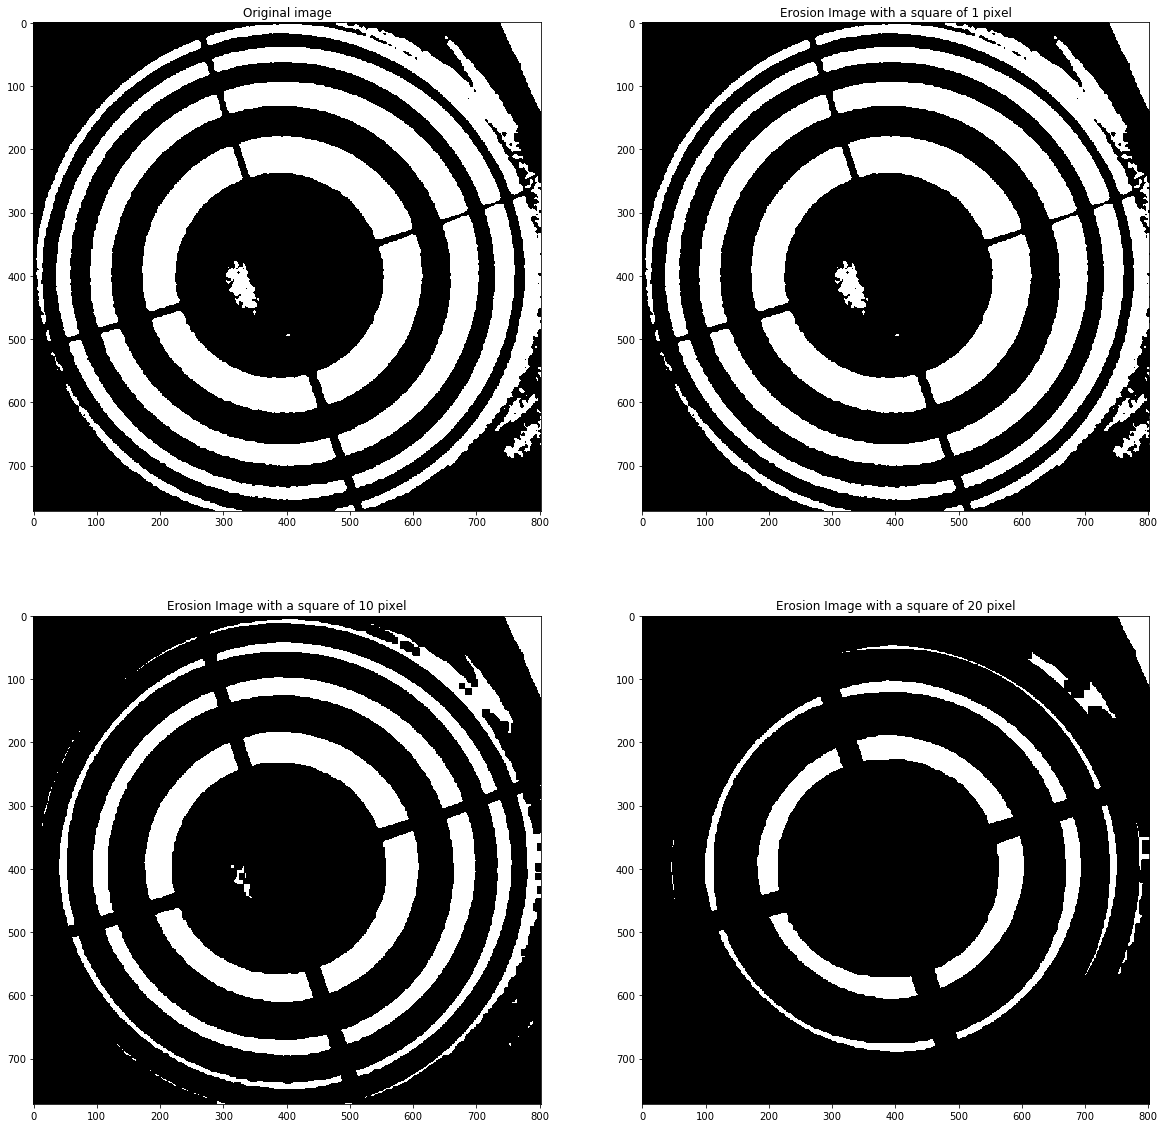

In [18]:
f, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,20))
ax = axes.ravel()

square1 = morphology.square(1)
square10 = morphology.square(10)
square20 = morphology.square(20)

Im = io.imread('./images/FindingContours.png',as_grey = True)
ImF = img_as_float(Im)

ImE1 = morphology.erosion(ImF, square1)
ImE10 = morphology.erosion(ImF, square10)
ImE20 = morphology.erosion(ImF, square20)

ax[0].imshow(ImF, cmap = cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(ImE1, cmap = cm.gray)
ax[1].set_title('Erosion Image with a square of 1 pixel')
ax[2].imshow(ImE10, cmap = cm.gray)
ax[2].set_title('Erosion Image with a square of 10 pixel')
ax[3].imshow(ImE20, cmap = cm.gray)
ax[3].set_title('Erosion Image with a square of 20 pixel')


** Q.1.2 Dilation **

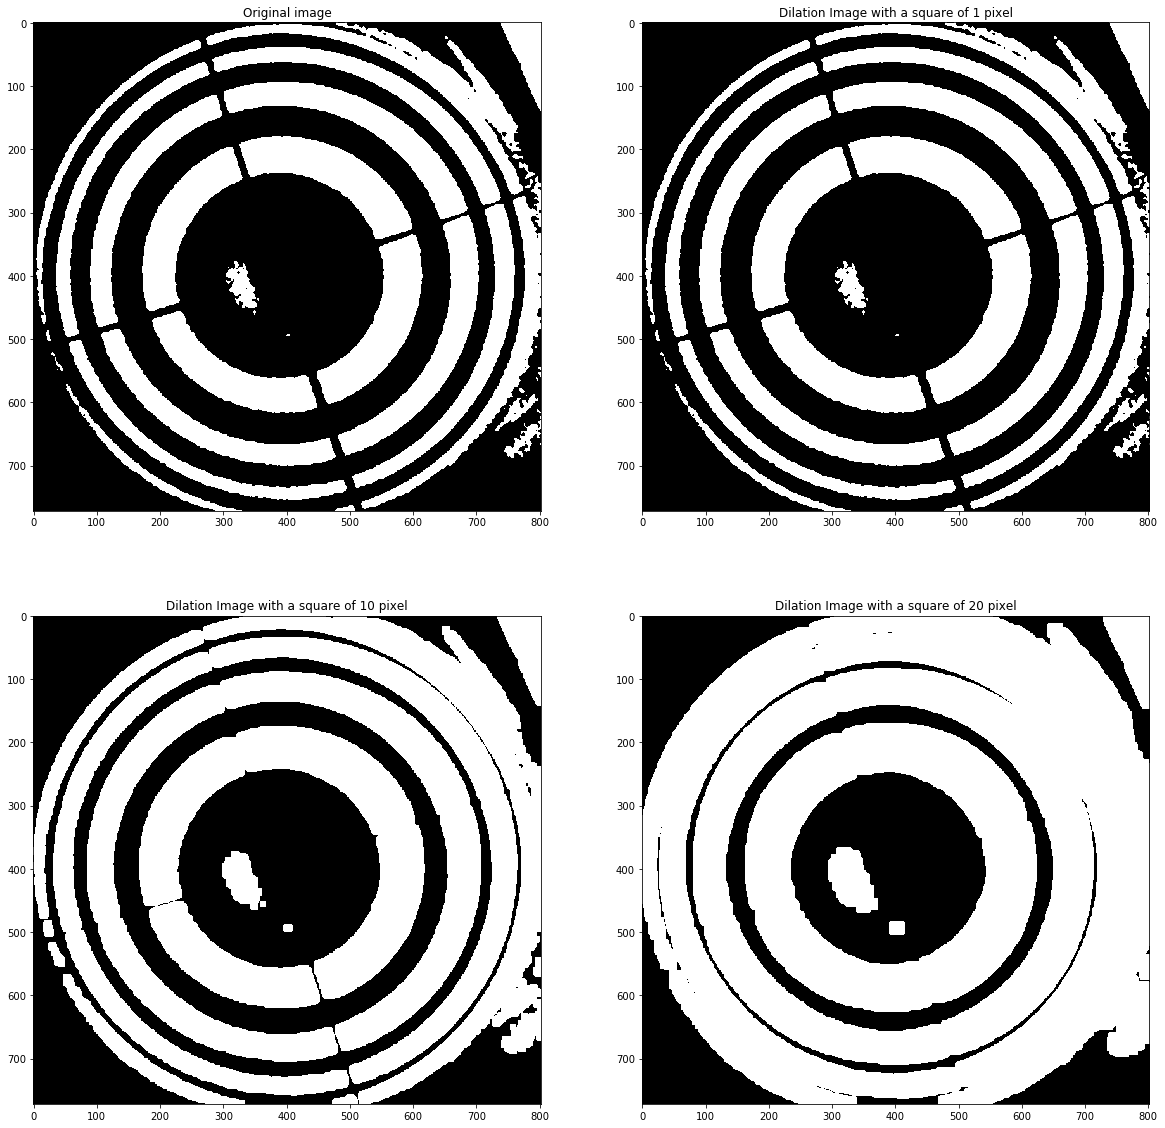

In [19]:
f, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,20))
ax = axes.ravel()

square1 = morphology.square(1)
square10 = morphology.square(10)
square20 = morphology.square(20)

Im = io.imread('./images/FindingContours.png',as_grey = True)
ImF = img_as_float(Im)

ImE1 = morphology.dilation(ImF, square1)
ImE10 = morphology.dilation(ImF, square10)
ImE20 = morphology.dilation(ImF, square20)

ax[0].imshow(ImF, cmap = cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(ImE1, cmap = cm.gray)
ax[1].set_title('Dilation Image with a square of 1 pixel')
ax[2].imshow(ImE10, cmap = cm.gray)
ax[2].set_title('Dilation Image with a square of 10 pixel')
ax[3].imshow(ImE20, cmap = cm.gray)
ax[3].set_title('Dilation Image with a square of 20 pixel')

** Q.1.3 Opening **

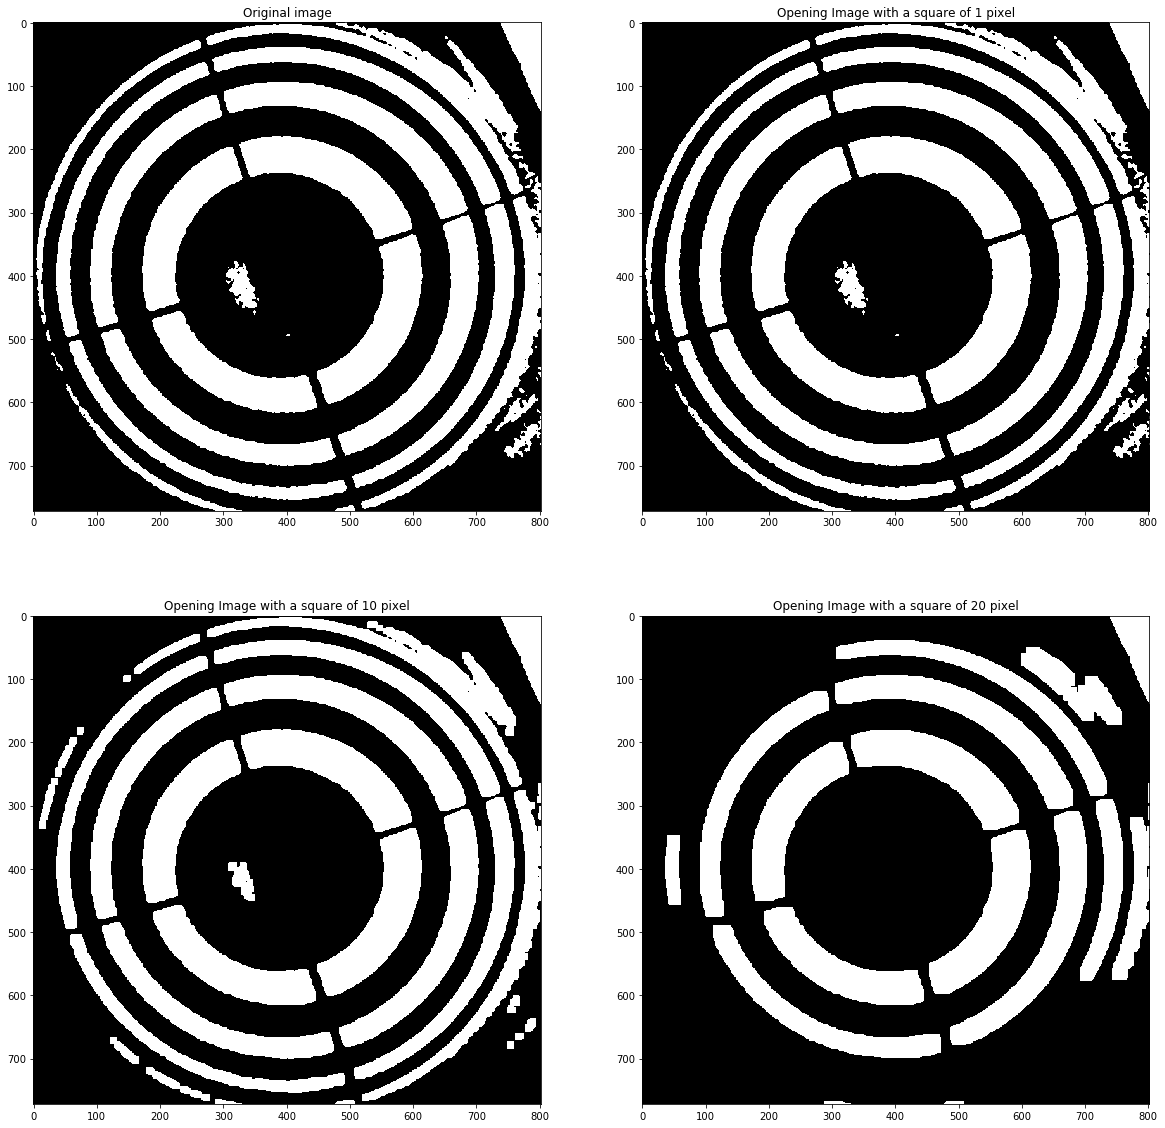

In [20]:
f, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,20))
ax = axes.ravel()

square1 = morphology.square(1)
square10 = morphology.square(10)
square20 = morphology.square(20)

Im = io.imread('./images/FindingContours.png',as_grey = True)
ImF = img_as_float(Im)

ImE1 = morphology.opening(ImF, square1)
ImE10 = morphology.opening(ImF, square10)
ImE20 = morphology.opening(ImF, square20)

ax[0].imshow(ImF, cmap = cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(ImE1, cmap = cm.gray)
ax[1].set_title('Opening Image with a square of 1 pixel')
ax[2].imshow(ImE10, cmap = cm.gray)
ax[2].set_title('Opening Image with a square of 10 pixel')
ax[3].imshow(ImE20, cmap = cm.gray)
ax[3].set_title('Opening Image with a square of 20 pixel')

** Q.1.4 Closing**

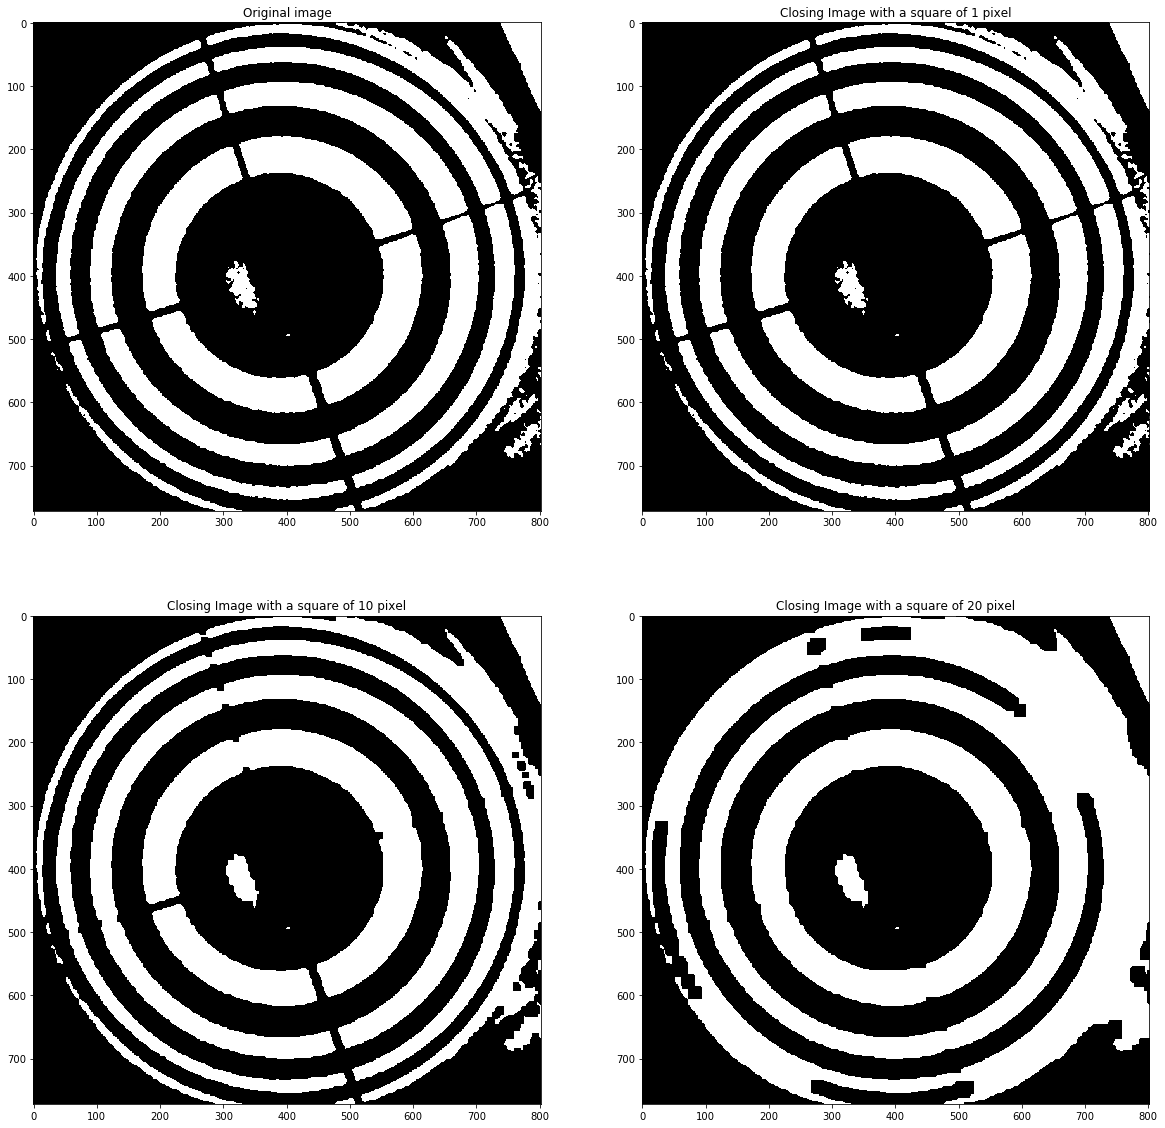

In [21]:
f, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,20))
ax = axes.ravel()

square1 = morphology.square(1)
square10 = morphology.square(10)
square20 = morphology.square(20)

Im = io.imread('./images/FindingContours.png',as_grey = True)
ImF = img_as_float(Im)

ImE1 = morphology.closing(ImF, square1)
ImE10 = morphology.closing(ImF, square10)
ImE20 = morphology.closing(ImF, square20)

ax[0].imshow(ImF, cmap = cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(ImE1, cmap = cm.gray)
ax[1].set_title('Closing Image with a square of 1 pixel')
ax[2].imshow(ImE10, cmap = cm.gray)
ax[2].set_title('Closing Image with a square of 10 pixel')
ax[3].imshow(ImE20, cmap = cm.gray)
ax[3].set_title('Closing Image with a square of 20 pixel')

** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

#Erosion shrinks bright regions and enlarges dark regions, dilation enlarges bright regions and shrinks dark regions.
#Opening can remove small bright spots and connect small dark cracks. 
#Closing can remove small dark spots and connect small bright cracks. 

## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

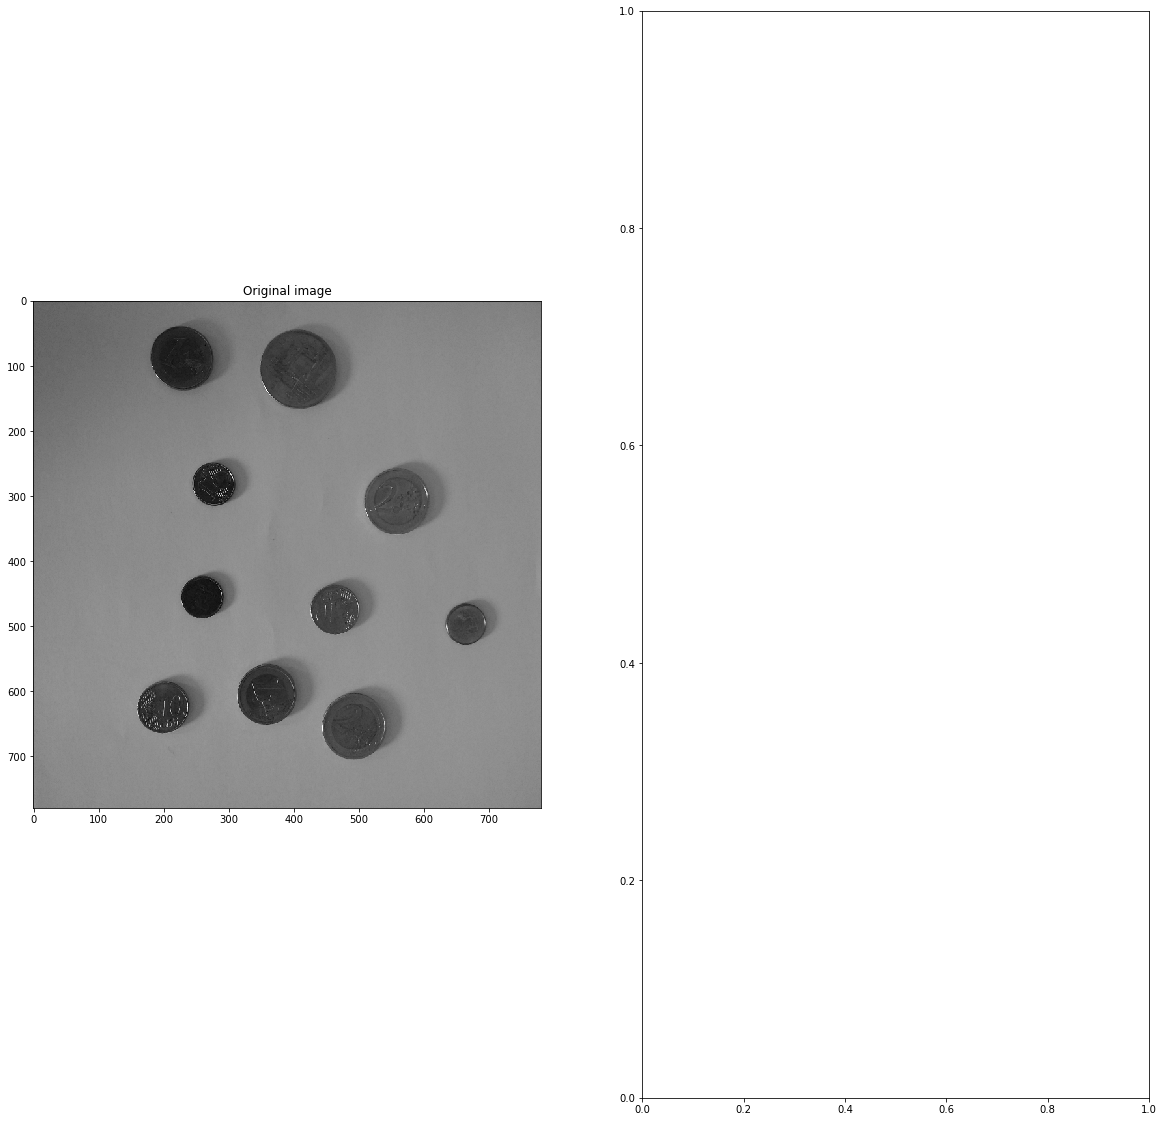

In [39]:
from skimage.transform import resize

f, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,20))
ax = axes.ravel()

Im = io.imread('./images/coins.jpg',as_grey = True)
ImF = img_as_ubyte(Im)

ImR = resize(ImF, (ImF.shape[0] / 4, ImF.shape[1] / 4))

ax[0].imshow(ImR, cmap = cm.gray)
ax[0].set_title('Original image')

**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

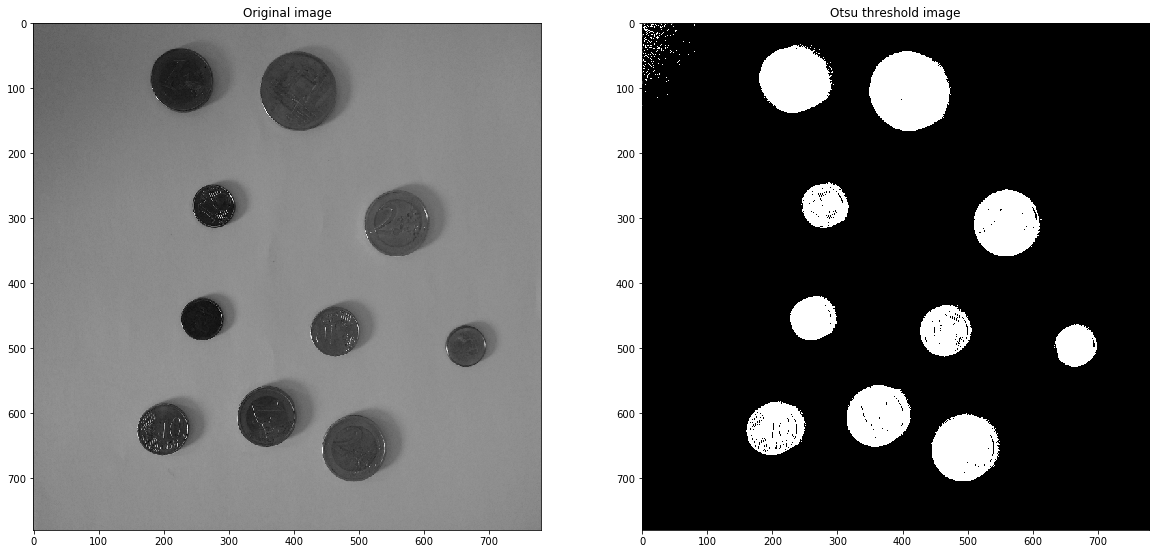

In [40]:
f, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,20))
ax = axes.ravel()

Im = io.imread('./images/coins.jpg',as_grey = True)
ImF = img_as_ubyte(Im)

ImR = resize(ImF, (ImF.shape[0] / 4, ImF.shape[1] / 4))

thresh = filters.threshold_otsu(ImR)
binary = ImR <= thresh

ax[0].imshow(ImR, cmap = cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(binary, cmap = cm.gray)
ax[1].set_title('Otsu threshold image')


**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

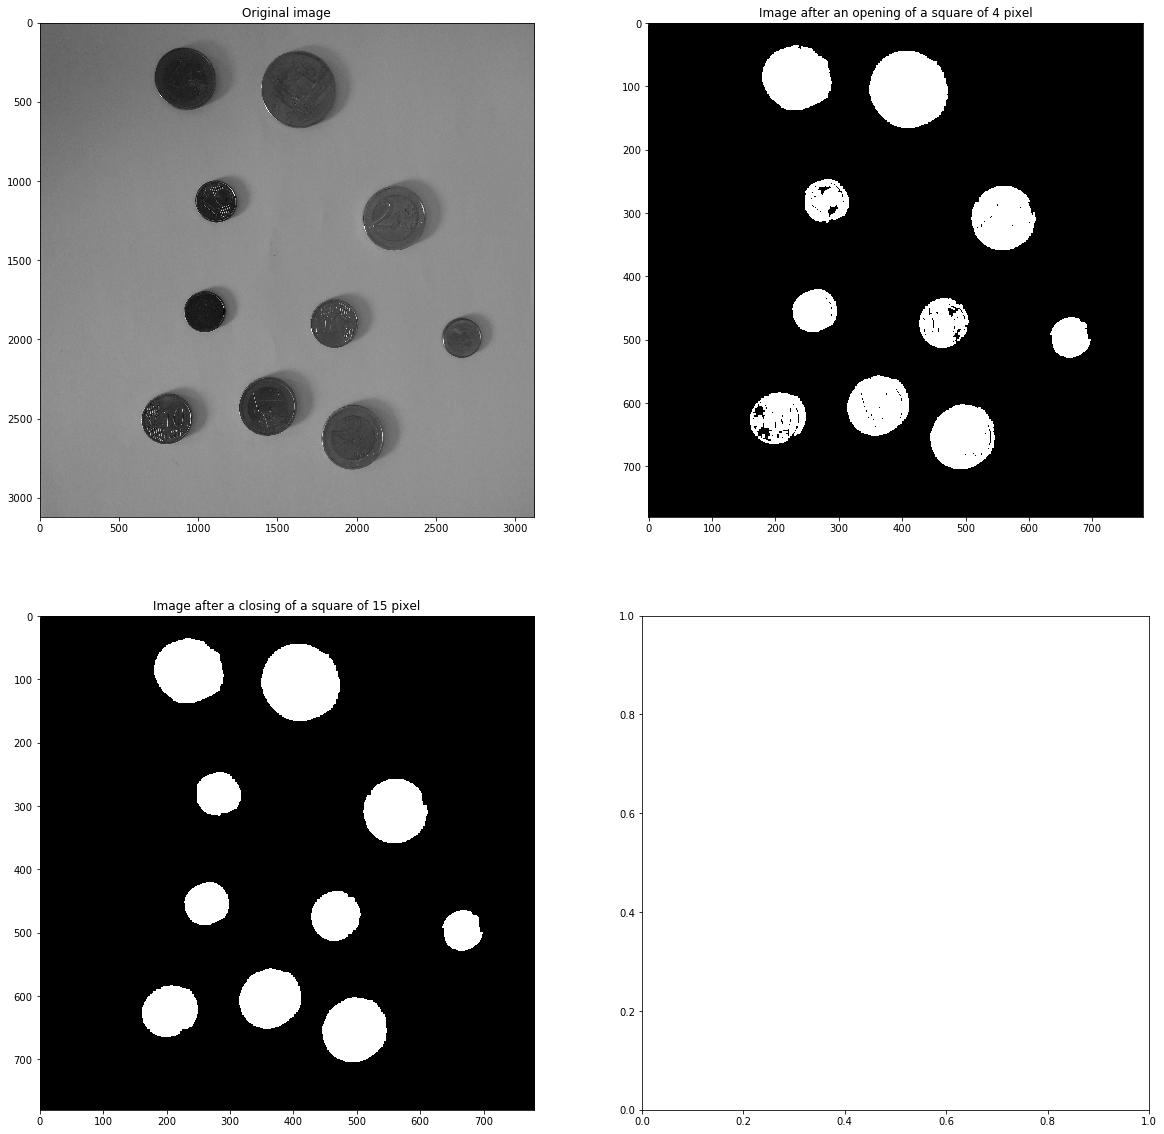

In [77]:
f, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,20))
ax = axes.ravel()

Im = io.imread('./images/coins.jpg',as_grey = True)
ImF = img_as_ubyte(Im)

ImR = resize(ImF, (ImF.shape[0] / 4, ImF.shape[1] / 4))

ax[0].imshow(ImF, cmap = cm.gray)
ax[0].set_title('Original image')

thresh = filters.threshold_otsu(ImR)
binary = ImR <= thresh

ImE4 = morphology.opening(binary, morphology.square(4))
ax[1].imshow(ImE4, cmap = cm.gray)
ax[1].set_title('Image after an opening of a square of 4 pixel')

ImE4 = morphology.closing(ImE4, morphology.square(15))
ax[2].imshow(ImE4, cmap = cm.gray)
ax[2].set_title('Image after a closing of a square of 15 pixel')


**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


11


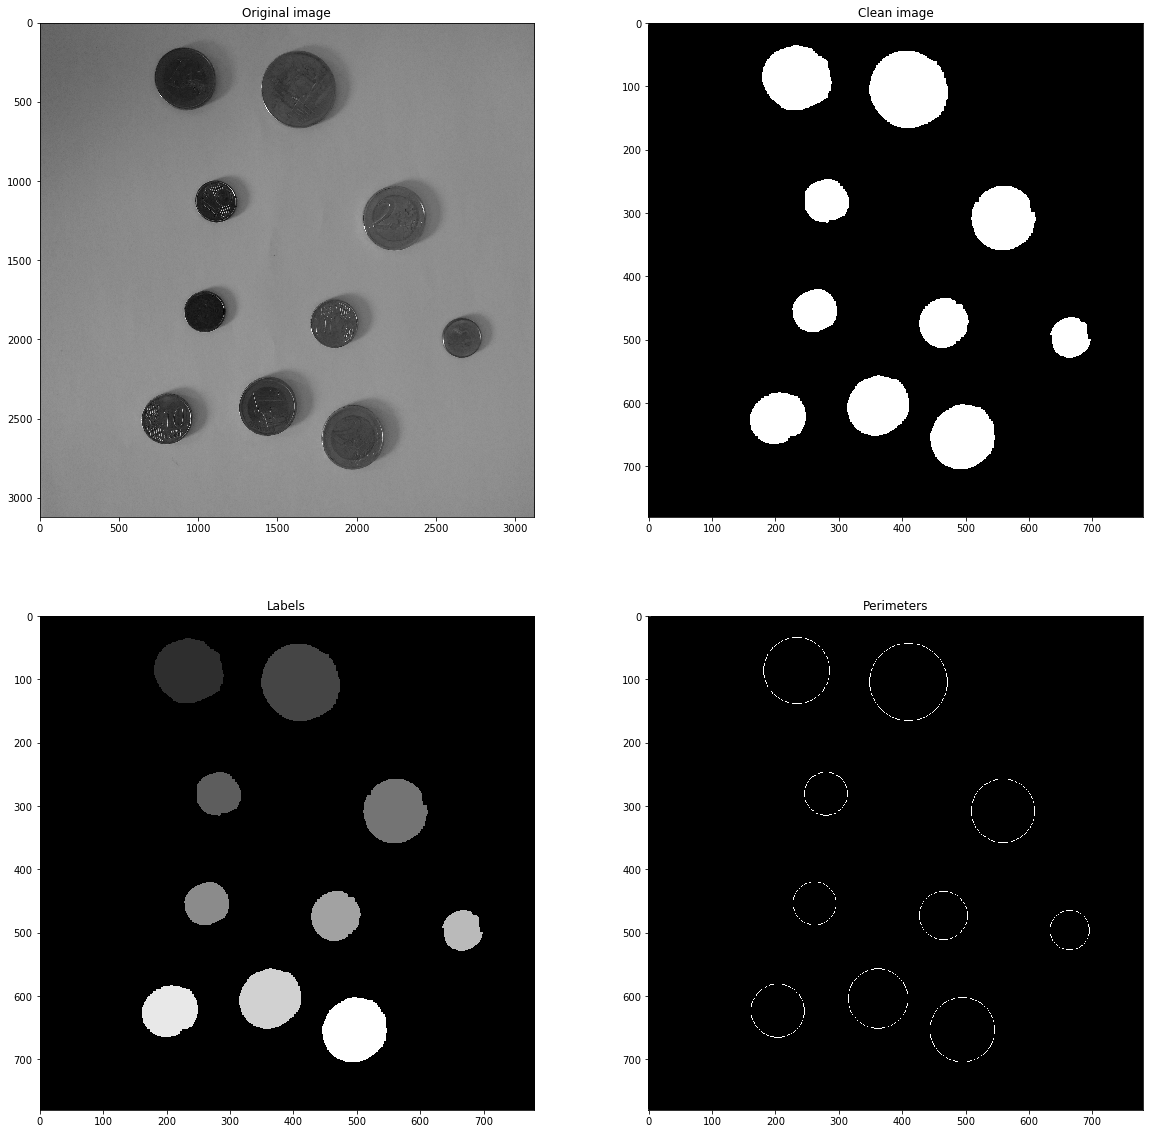

In [129]:
f, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,20))
ax = axes.ravel()

Im = io.imread('./images/coins.jpg',as_grey = True)
ImF = img_as_ubyte(Im)

ImR = resize(ImF, (ImF.shape[0] / 4, ImF.shape[1] / 4))

ax[0].imshow(ImF, cmap = cm.gray)
ax[0].set_title('Original image')

thresh = filters.threshold_otsu(ImR)
binary = ImR <= thresh

ImE4 = morphology.opening(binary, morphology.square(4))
ImE4 = morphology.closing(ImE4, morphology.square(15))

ax[1].imshow(ImE4, cmap = cm.gray)
ax[1].set_title('Clean image')

(ImLabel, Numb) = measure.label(ImE4, return_num=True)
ax[2].imshow(ImLabel, cmap = cm.gray)
ax[2].set_title('Labels')
print(Numb)

ImageProperties = measure.regionprops(ImLabel)

Area = np.zeros((ImE4.shape[0], ImE4.shape[1]),dtype=np.uint8)
for region in ImageProperties:
    peri = region.equivalent_diameter
    (x,y) = region.centroid
    Z = draw.circle_perimeter(int(x), int(y), int(peri/2))
    Area[Z] = 1
    
    
ax[3].imshow(Area, cmap = cm.gray)
ax[3].set_title('Perimeters')

### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

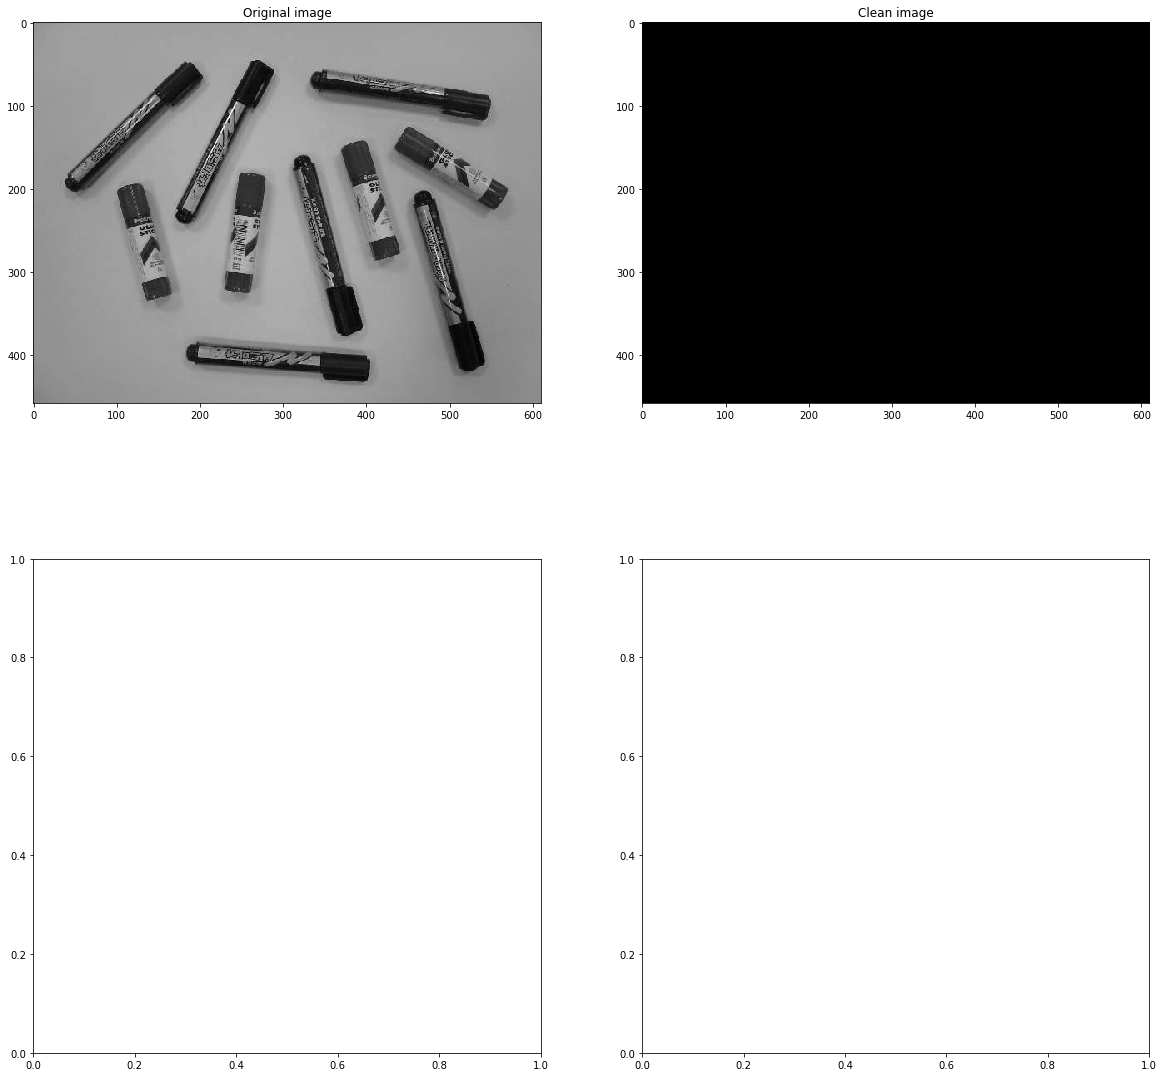

In [135]:
f, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,20))
ax = axes.ravel()

Im = io.imread('./images/objets4.jpg',as_grey = True)
ImF = img_as_ubyte(Im)

ax[0].imshow(ImF, cmap = cm.gray)
ax[0].set_title('Original image')

thresh = filters.threshold_otsu(ImR)
binary = ImF >= thresh

ImE4 = morphology.opening(binary, morphology.square(4))
ImE4 = morphology.closing(ImE4, morphology.square(15))

ax[1].imshow(ImE4, cmap = cm.gray)
ax[1].set_title('Clean image')
